In [16]:
import pickle as pkl
from denoisers.ConditionalUnetDenoiser import ConditionalUnetDenoiser
from dataset.dataset import SaladsDataset
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import torch
import random

In [3]:
with open("../runs/unet_cond_ce/epoch_19900_batch_0_test.pkl", "rb") as f:
    salads_final = pkl.load(f)

with open("../runs/unet_cond_ce_gtea/epoch_5900_batch_0_test.pkl", "rb") as f:
    gtea_final = pkl.load(f)

with open("../runs/unet_cond_ce_breakfast/epoch_5800_train.pkl", "rb") as f:
    breakfast_final_train = pkl.load(f)

In [7]:
with open("../data/pickles/50_salads_unified.pkl", "rb") as f:
    salads_data = pkl.load(f)
    
with open("../data/pickles/gtea_unified.pkl", "rb") as f:
    gtea_data = pkl.load(f)
    
with open("../data/pickles/breakfast_unified.pkl", "rb") as f:
    breakfast_data = pkl.load(f)

In [8]:
salads_dataset = SaladsDataset(salads_data['target'], salads_data['stochastic'])
gtea_dataset = SaladsDataset(salads_data['target'], salads_data['stochastic'])
breakfast_dataset = SaladsDataset(salads_data['target'], salads_data['stochastic'])

In [11]:
salads_denoiser = ConditionalUnetDenoiser(in_ch=20, out_ch=20, max_input_dim=salads_dataset.sequence_length).to('cuda').float()
gtea_denoiser = ConditionalUnetDenoiser(in_ch=12, out_ch=12, max_input_dim=gtea_dataset.sequence_length).to('cuda').float()
breakfast_denoiser = ConditionalUnetDenoiser(in_ch=49, out_ch=49, max_input_dim=breakfast_dataset.sequence_length).to('cuda').float()

In [14]:
salads_original = torch.argmax(torch.softmax(salads_final['original'], dim=1), dim=1)
salads_recovered = torch.argmax(torch.softmax(salads_final['denoised'], dim=1), dim=1)
gtea_original = torch.argmax(torch.softmax(gtea_final['original'], dim=1), dim=1)
gtea_recovered = torch.argmax(torch.softmax(gtea_final['denoised'], dim=1), dim=1)
breakfast_original = torch.argmax(torch.softmax(breakfast_final_train['original'], dim=1), dim=1)
breakfast_recovered = torch.argmax(torch.softmax(breakfast_final_train['denoised'], dim=1), dim=1)

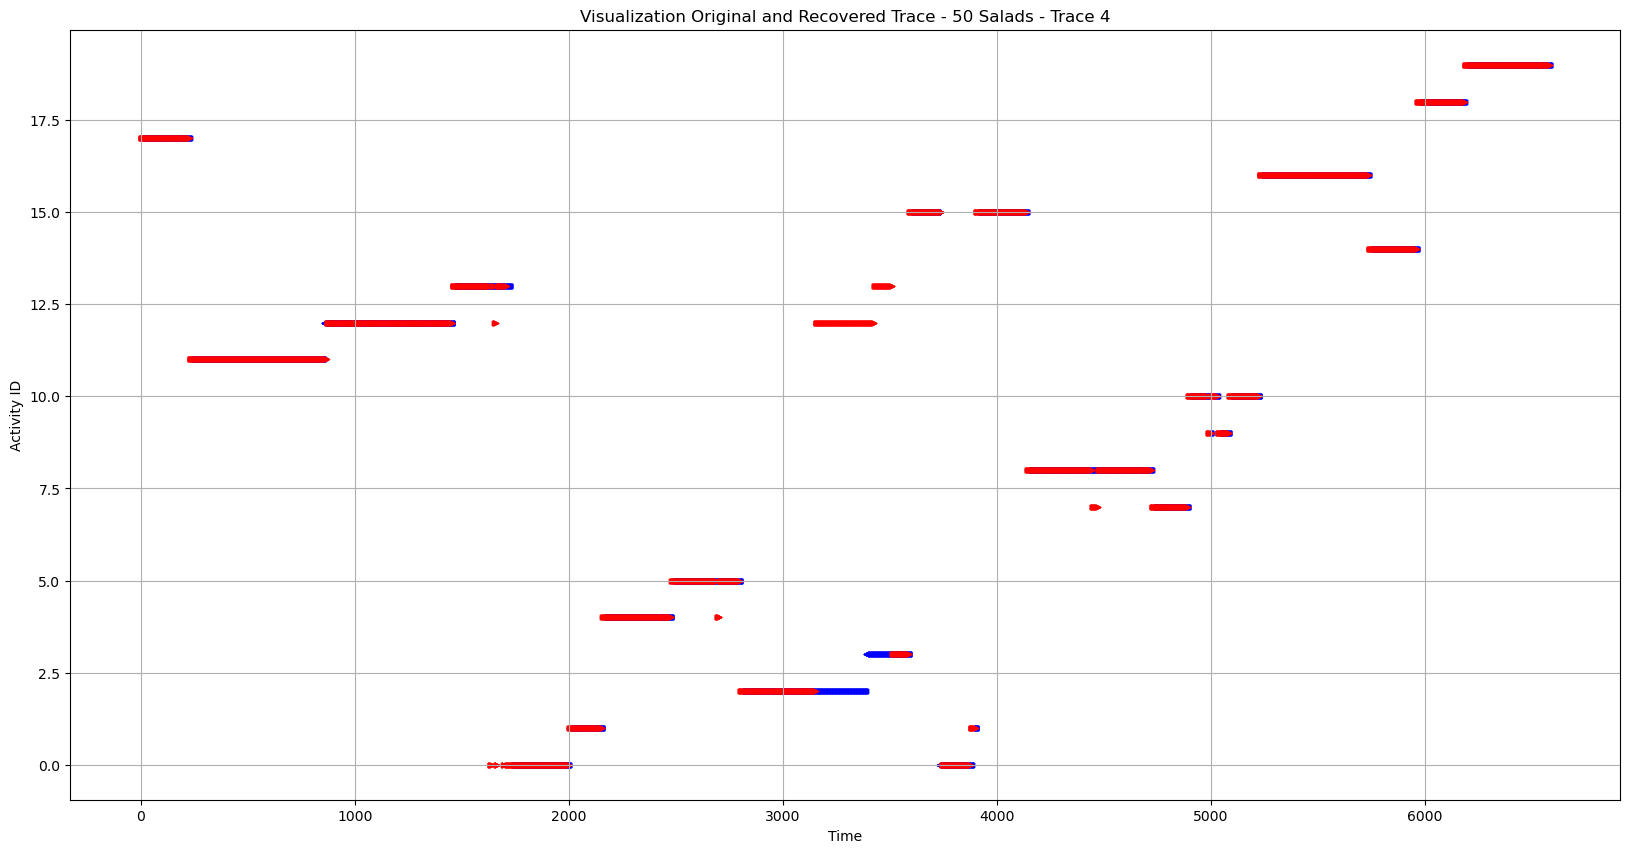

In [34]:
import matplotlib.pyplot as plt

i = random.choice(range(len(salads_original)))
original, recovered = salads_original[i].to('cpu'), salads_recovered[i].to('cpu')

plt.figure(figsize=(20, 10))
plt.scatter(range(len(original)), original, marker='<', c='b', s=10)
plt.scatter(range(len(recovered)), recovered, marker='>', c='r', s=10)

plt.xlabel('Time')
plt.ylabel('Activity ID')
plt.title(f'Visualization Original and Recovered Trace - 50 Salads - Trace {i}')
plt.grid(True)

plt.show()

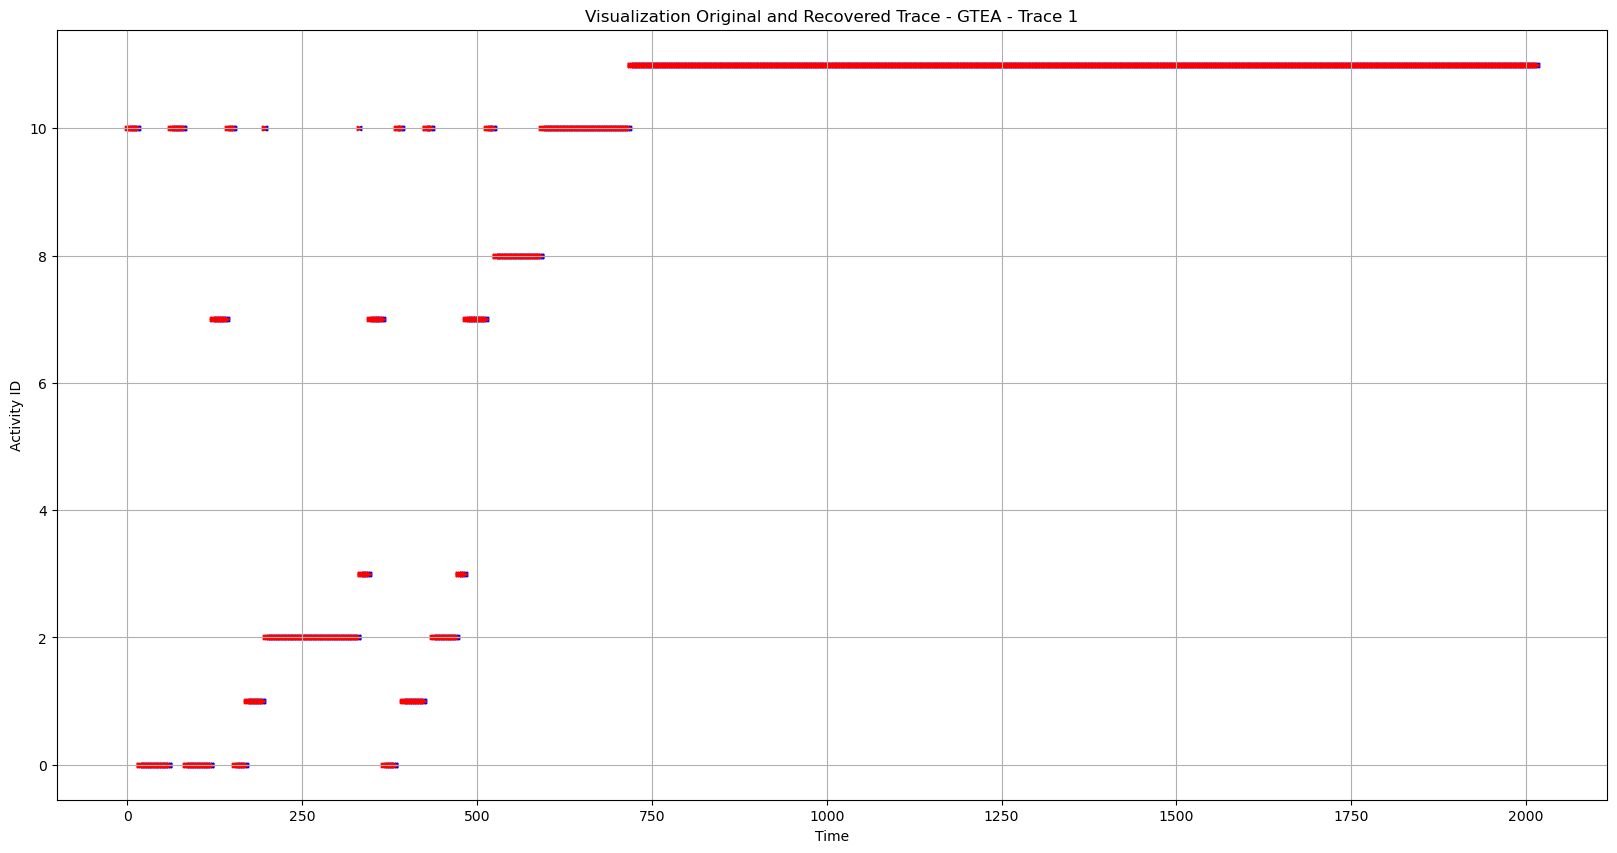

In [32]:
import matplotlib.pyplot as plt

i = random.choice(range(len(gtea_original)))
original, recovered = gtea_original[i].to('cpu'), gtea_recovered[i].to('cpu')

plt.figure(figsize=(20, 10))
plt.scatter(range(len(original)), original, marker='<', c='b', s=10)
plt.scatter(range(len(recovered)), recovered, marker='>', c='r', s=10)

plt.xlabel('Time')
plt.ylabel('Activity ID')
plt.title(f'Visualization Original and Recovered Trace - GTEA - Trace {i}')
plt.grid(True)

plt.show()

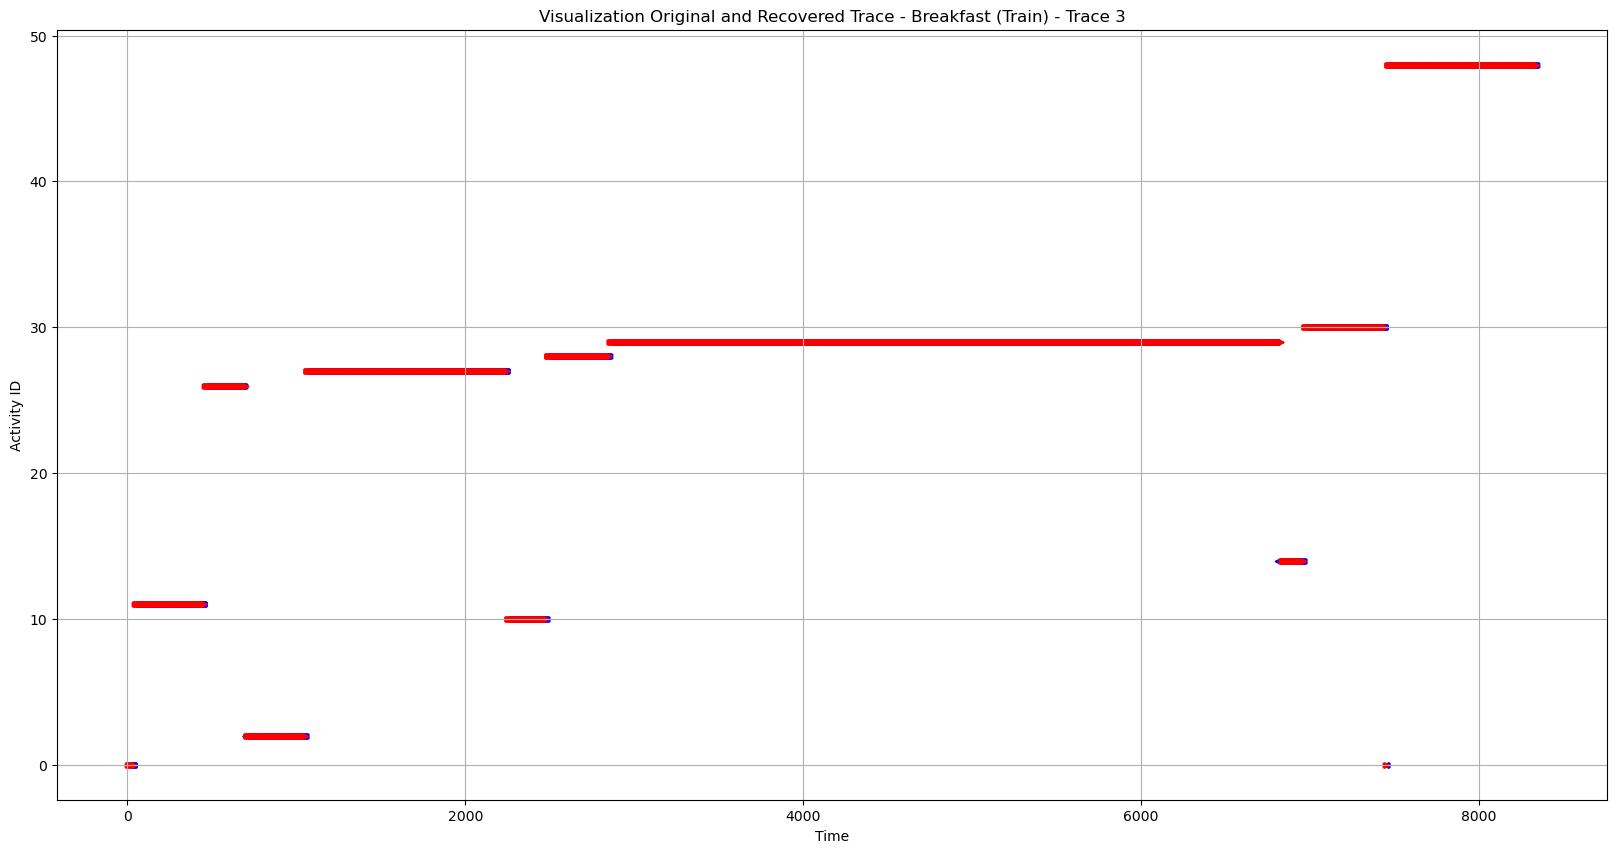

In [33]:
plt.show()
import matplotlib.pyplot as plt

i = random.choice(range(len(breakfast_original)))
original, recovered = breakfast_original[i].to('cpu'), breakfast_recovered[i].to('cpu')

plt.figure(figsize=(20, 10))
plt.scatter(range(len(original)), original, marker='<', c='b', s=10)
plt.scatter(range(len(recovered)), recovered, marker='>', c='r', s=10)

plt.xlabel('Time')
plt.ylabel('Activity ID')
plt.title(f'Visualization Original and Recovered Trace - Breakfast (Train) - Trace {i}')
plt.grid(True)

plt.show()